In [5]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/ML/updated/Jamuna_HistoricalPrices - Jamuna_HistoricalPrices.csv')

In [6]:
df

,Date,Open,High,Low,Close,Volume
0,2008-01-21,151.60,169.94,151.60,168.83,8.941935e+05
1,2008-01-22,163.01,173.20,146.95,148.74,5.663553e+05
2,2008-01-23,143.04,150.78,136.52,147.73,2.438420e+06
3,2008-01-24,150.78,150.78,142.59,145.16,7.514759e+06
4,2008-01-28,148.34,149.15,144.67,145.77,6.591119e+05
...,...,...,...,...,...,...
2755,2022-08-04,169.00,170.00,168.10,168.90,1.049000e+04
2756,2022-08-08,171.00,174.90,171.00,173.80,1.278700e+04
2757,2022-08-10,179.50,179.50,169.10,170.80,1.738800e+04
2758,2022-08-11,171.00,173.40,169.10,169.50,1.369100e+04


In [7]:
df = df[['Date', 'Close']]
df.head(10)

,Date,Close
0,2008-01-21,168.83
1,2008-01-22,148.74
2,2008-01-23,147.73
3,2008-01-24,145.16
4,2008-01-28,145.77
5,2008-01-29,143.20
6,2008-01-30,139.53
7,2008-01-31,141.78
8,2008-02-04,139.49
9,2008-02-05,145.89


In [8]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('2008-01-31')
datetime_object

datetime.datetime(2008, 1, 31, 0, 0)

In [9]:
df['Date'] = df['Date'].apply(str_to_datetime)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [10]:
df['Date']

0      2008-01-21
1      2008-01-22
2      2008-01-23
3      2008-01-24
4      2008-01-28
          ...    
2755   2022-08-04
2756   2022-08-08
2757   2022-08-10
2758   2022-08-11
2759   2022-08-16
Name: Date, Length: 2760, dtype: datetime64[ns]

In [11]:
df.index = df.pop('Date')

In [12]:
df.index

DatetimeIndex(['2008-01-21', '2008-01-22', '2008-01-23', '2008-01-24',
               '2008-01-28', '2008-01-29', '2008-01-30', '2008-01-31',
               '2008-02-04', '2008-02-05',
               ...
               '2022-07-27', '2022-07-28', '2022-08-01', '2022-08-02',
               '2022-08-03', '2022-08-04', '2022-08-08', '2022-08-10',
               '2022-08-11', '2022-08-16'],
              dtype='datetime64[ns]', name='Date', length=2760, freq=None)

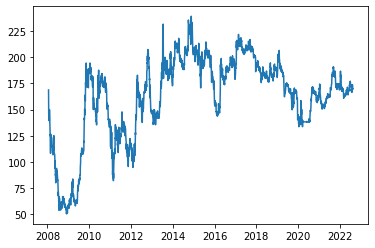

In [13]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

In [14]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date
  #print(target_date)
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+2)
    #print(df_subset)
    
    if len(df_subset) != n+2:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=100)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n+1):
    X[:, i]
    ret_df[f'Target-{n+1-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df



In [15]:
# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df, 
                                '2008-01-31', 
                                '2022-08-11',                         
                                n=5)
windowed_df

,Target Date,Target-6,Target-5,Target-4,Target-3,Target-2,Target-1,Target
0,2008-01-31,148.74,147.73,145.16,145.77,143.20,139.53,141.78
1,2008-02-04,147.73,145.16,145.77,143.20,139.53,141.78,139.49
2,2008-02-05,145.16,145.77,143.20,139.53,141.78,139.49,145.89
3,2008-02-06,145.77,143.20,139.53,141.78,139.49,145.89,150.01
4,2008-02-07,143.20,139.53,141.78,139.49,145.89,150.01,148.30
...,...,...,...,...,...,...,...,...
2747,2022-08-03,167.00,167.80,167.70,166.50,169.60,170.00,170.40
2748,2022-08-04,167.80,167.70,166.50,169.60,170.00,170.40,168.90
2749,2022-08-08,167.70,166.50,169.60,170.00,170.40,168.90,173.80
2750,2022-08-10,166.50,169.60,170.00,170.40,168.90,173.80,170.80


In [16]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((2752,), (2752, 6, 1), (2752,))

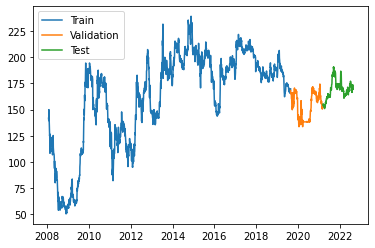

In [17]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90,]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((6, 1)),
                    layers.LSTM(128),
                    layers.Dense(64, activation='relu'),
                    layers.Dense(64, activation='relu'),
                    layers.Dense(64, activation='relu'),
                    layers.Dense(64, activation='relu'),
                    layers.Dense(64, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', optimizer=Adam(learning_rate=0.001), metrics=['mean_absolute_error'])

# model.compile(
#     optimizer=Adam(learning_rate=0.001),
#     loss='mse',
#     metrics=[tf.keras.metrics.RootMeanSquaredError()])


In [20]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
69/69 [==============================] - 1s 10ms/step - loss: 17.0440 - mean_absolute_error: 2.9445 - val_loss: 6.8054 - val_mean_absolute_error: 1.6426
Epoch 2/100
69/69 [==============================] - 1s 10ms/step - loss: 16.2082 - mean_absolute_error: 2.8317 - val_loss: 19.5924 - val_mean_absolute_error: 3.8670
Epoch 3/100
69/69 [==============================] - 1s 10ms/step - loss: 18.3639 - mean_absolute_error: 3.0745 - val_loss: 7.5193 - val_mean_absolute_error: 1.8193
Epoch 4/100
69/69 [==============================] - 1s 11ms/step - loss: 15.5783 - mean_absolute_error: 2.7765 - val_loss: 10.9618 - val_mean_absolute_error: 2.5468
Epoch 5/100
69/69 [==============================] - 1s 11ms/step - loss: 17.6441 - mean_absolute_error: 3.0421 - val_loss: 7.7431 - val_mean_absolute_error: 1.8789
Epoch 6/100
69/69 [==============================] - 1s 12ms/step - loss: 17.7141 - mean_absolute_error: 3.0120 - val_loss: 7.6061 - val_mean_absolute_error: 1.8545
Epoch 7/

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               66560     
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 1)                 6

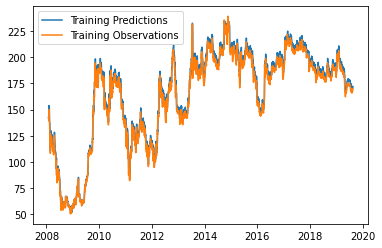

In [22]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

In [23]:
results = model.evaluate(X_train, y_train)

69/69 [==============================] - 0s 4ms/step - loss: 26.7686 - mean_absolute_error: 4.3117


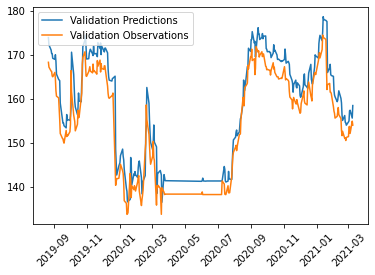

In [24]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.xticks(rotation = 45)
plt.legend(['Validation Predictions', 'Validation Observations'])

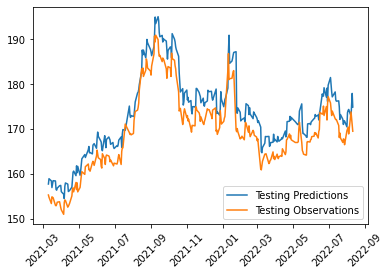

In [25]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.xticks(rotation = 45)
plt.legend(['Testing Predictions', 'Testing Observations'])

In [26]:
results = model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 6ms/step - loss: 19.3494 - mean_absolute_error: 4.0155


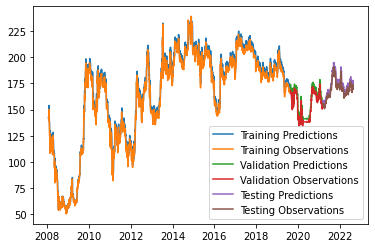

In [27]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])